In [324]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [325]:
#Defines Global Variables data entries
TOTAL_DATA = 150

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

# Number of input features
FEATURE_NUMBER = 4

# Number of classes and respective indexing
CLASS_NUMBER = 3
CLASSNAMES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [326]:
# Read in data
data = pd.read_csv('../DataSets/Iris.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica
128,129,6.4,2.8,5.6,2.1,Iris-virginica
57,58,4.9,2.4,3.3,1.0,Iris-versicolor


In [327]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)



In [328]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train_data = data.iloc[:TRAINING_DATA, -1].values
y_test_data = data.iloc[TRAINING_DATA:, -1].values

# Create vectorized representations of each data point's class membership
y_train = np.zeros(shape=(CLASS_NUMBER, TRAINING_DATA))
y_test = np.zeros(shape=(CLASS_NUMBER, TESTING_DATA))

# Setting numeric labels for each data point's class
for row in range(CLASS_NUMBER):
    y_train[row, :TRAINING_DATA]  = [ele == CLASSNAMES[row] for ele in y_train_data]
    y_test[row, :TESTING_DATA] = [ele == CLASSNAMES[row] for ele in y_test_data]

In [329]:
# Randomly initialize weights and bias matricies
w = np.random.rand(CLASS_NUMBER, FEATURE_NUMBER)
b = np.random.rand(CLASS_NUMBER, 1)



In [330]:
#Class coresspondance function, returns a vector (z), which will be input into softmax function
#The highest number in z represents the correct class
def class_corr(weights, bias, x):
    
    numData = x.shape[1]
    #print(numData)
    z = weights.dot(x)
    #print(z)
    for input in range(numData):
        z[0:CLASS_NUMBER, input:input+1] += bias

    return z

z = class_corr(w, b, x_test)
print(z)



[[ 0.63631831 -0.68928315  2.2488651   1.58051226  1.46469609  2.35229047
  -1.69068983  0.53757037 -0.86877161 -1.24194176 -0.05226232 -0.98054607
   0.50207553  1.03974058  0.69486163  0.42329643  0.40875901  0.25119993
  -0.18478775  1.58379614 -1.20177064  0.07706752 -0.09989402 -1.46352886
   1.24311804  1.30317207  1.19829606  0.20944154  0.87517464  1.59887713]
 [ 0.89351241 -1.30679933  2.93197701  2.31237535  2.31034231  3.16440065
  -2.58177772  0.85141759 -1.7962081  -2.36453659 -0.39877821 -1.77566592
   0.59236255  1.26198095  0.61836915  0.09194843  0.13890511  0.01667191
  -0.79087566  2.10606667 -2.42581809 -1.08623304 -0.58425302 -2.53315328
   1.41247392  1.63969164  1.49653887 -0.11594238  0.50914954  2.16540831]
 [ 0.2572837  -0.5641821   2.04526335  1.75004618  2.17603067  2.47924462
  -1.64152412  1.45019971 -1.60335477 -1.88301734 -0.22292168 -1.35579907
   0.28964197  0.53071653  0.28208322 -0.43895058  0.2517444   0.06454905
  -0.79085405  1.81397811 -1.4226193

In [331]:
#Softmax Function
#expnentiates all elements of the z vector and divides by their sum to see class probability
def softmax(z):

    #creates empty probability array
    y_hat = np.empty([z.shape[0], z.shape[1]])
    numData = z.shape[1]

    #exponentiates the matrix
    z_exp = np.exp(z)

    #Converts z vector into probability distribution
    for input in range(numData):
        z_sum = np.sum(z_exp[0:CLASS_NUMBER, input:input+1])
        y_hat[0:CLASS_NUMBER, input:input+1] = z_exp[0:CLASS_NUMBER, input:input+1]/z_sum
    return y_hat


y_pred = softmax(z)
print(softmax(z))


[[0.33581635 0.37417515 0.26344789 0.23453792 0.18635195 0.22789314
  0.40640434 0.20578063 0.53325602 0.53991021 0.39211745 0.46758632
  0.34445908 0.35088292 0.38637356 0.46725313 0.38194433 0.38158073
  0.47824622 0.25350598 0.47712755 0.60754231 0.31255527 0.38257805
  0.32011514 0.28849078 0.30770019 0.4407572  0.38895932 0.26190289]
 [0.43430999 0.20178602 0.52163469 0.48759268 0.43410363 0.51336497
  0.16671082 0.28164796 0.21093819 0.17570527 0.27728491 0.2111279
  0.37700646 0.4382077  0.35792097 0.33546685 0.29161107 0.30180901
  0.26087407 0.42737333 0.14029346 0.18982854 0.1925628  0.13127683
  0.37918971 0.40390621 0.4146226  0.31833689 0.26973761 0.46151057]
 [0.22987366 0.42403884 0.21491742 0.2778694  0.37954442 0.25874189
  0.42688484 0.51257141 0.25580578 0.28438452 0.33059764 0.32128577
  0.27853445 0.21090938 0.25570547 0.19728002 0.3264446  0.31661026
  0.26087971 0.31912069 0.38257899 0.20262914 0.49488194 0.48614512
  0.30069514 0.307603   0.27767722 0.24090591 0

In [332]:
#Loss function
#Returns the sum of all probabilities compared to the actual class
def cost(y, y_pred):

    total_loss = 0

    #Finds number of data samples
    numData = y.shape[1]

    #Manipulates y_pred into right form for the loss function
    y_pred = -1*np.log(y_pred)

    #iterates over all data samples
    for column in range(numData):

        #Computes total class loss for each data sample and sums them
        y_cur = y[0:CLASS_NUMBER, column:column+1].transpose()
        y_pred_cur = (y_pred[0:CLASS_NUMBER, column:column+1])
        total_loss += y_cur.dot(y_pred_cur)[0][0]

    #Divdes by number of data samples to find average error
    total_loss = total_loss/numData
    return total_loss
    
    

        



cost(y_test, y_pred)

1.1088667098038714

In [333]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[1]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()
    

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  ((1/numData) * error.sum(axis=0)).reshape(1, CLASS_NUMBER)
    
    
    return gradientDict
y_pred = softmax(z)
findGradients(x_test, y_test, y_pred)

{'gradWeights': array([[-0.0209928 , -0.0203611 ,  0.0413539 ],
        [-0.08370206, -0.06394389,  0.14764595],
        [ 0.13975484,  0.01230437, -0.15205921],
        [-0.07351491, -0.09170995,  0.16522486]]),
 'gradBias': array([[ 0.16664173, -0.04640861, -0.12023312]])}

In [334]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate):
    for i in range(max_iter): 
        z = class_corr(weights, bias, x)
        #print(z.shape)
        y_pred = softmax(z)
        gradients = findGradients(x, y, y_pred)


        # Compute gradient descent
        weights = weights - ((learning_rate * gradients["gradWeights"]).transpose())
        bias = bias - ((learning_rate * gradients["gradBias"].transpose()))
       

        # Not required - meant to visualize model's performance
        loss = cost(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.9

    return weights, bias


In [335]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=50, learning_rate=0.01)

#print(w)
#print(b)

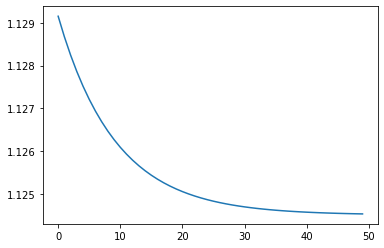

In [336]:
plt.plot(losses)

In [337]:
# Accuracy check (WORK IN PROGRESS)
z = class_corr(w, b, x_test)
y_pred = softmax(z)
y_pred = y_pred.transpose

for column in range(TESTING_DATA):
    if(y_pred[0][column] > y_pred[1][column] and y_pred[0][column] > y_pred[2][column]):
        y_pred[column] = [1, 0, 0]
    if(y_pred[1][column] > y_pred[0][column] and y_pred[1][column] > y_pred[2][column]):
        y_pred[column] = [0, 1, 0]
    if(y_pred[2][column] > y_pred[0][column] and y_pred[2][column] > y_pred[1][column]):
        y_pred[column] = [0, 0, 1]

print(y_pred)
np.sum((y_pred.transpose() == y_test))/TESTING_DATA*100

TypeError: 'builtin_function_or_method' object is not subscriptable